<a href="https://colab.research.google.com/github/PochampellyDeekshitha/MachineLearning/blob/main/ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Regression CO1,2 B4
For this exercise, you will experiment with regression, regularization, and cross-validation. Choose
appropriate Dataset.


(a) Load the data into memory. Make an appropriate X matrix and y vector.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("favorite_music_dataset.csv")   # load dataset
data.head()


,Song_Title,Artist,Genre,Release_Year,Duration_Minutes,Listened_Date,Platform
0,Faded,Alan Walker,Electronic,2024,4.02,2024-02-10,Apple Music
1,Blinding Lights,The Weeknd,Synth-pop,2018,4.45,2024-05-30,Zing MP3
2,Faded,Alan Walker,Electronic,2024,4.86,2024-05-07,Zing MP3
3,Faded,Alan Walker,Electronic,2012,4.92,2024-03-19,YouTube
4,Bohemian Rhapsody,Queen,Rock,2023,3.90,2024-01-16,Apple Music


In [ ]:
data.shape

(100, 7)

In [ ]:
print(data.head())   # returns some rows from the top

          Song_Title       Artist       Genre  Release_Year  Duration_Minutes  \
0              Faded  Alan Walker  Electronic          2024              4.02   
1    Blinding Lights   The Weeknd   Synth-pop          2018              4.45   
2              Faded  Alan Walker  Electronic          2024              4.86   
3              Faded  Alan Walker  Electronic          2012              4.92   
4  Bohemian Rhapsody        Queen        Rock          2023              3.90   

  Listened_Date     Platform  
0    2024-02-10  Apple Music  
1    2024-05-30     Zing MP3  
2    2024-05-07     Zing MP3  
3    2024-03-19      YouTube  
4    2024-01-16  Apple Music  


In [ ]:
print(data.columns)

Index(['Song_Title', 'Artist', 'Genre', 'Release_Year', 'Duration_Minutes',
       'Listened_Date', 'Platform'],
      dtype='object')


In [ ]:
[col for col in data.columns if data[col].isnull().sum()>0]  #check if null values there or not

[]

In [ ]:
data=data.drop_duplicates()   # dropping duplicates if present

In [ ]:
data.shape

(100, 7)

(b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will
be used for training + validation, and a testing set Xtest, ytest (containing remaining instances).

In [ ]:
X = data.drop(columns=['Duration_Minutes'])   # taking feature as duration minutes
y = data['Duration_Minutes']                  #  setting target as duration minutess
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
# Split dataset model into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Feature matrix shape: (100, 6)
Target vector shape: (100,)
Training size: (80, 6)
Testing size: (20, 6)


(c) Give the objective of logistic regression with L2 regularization.

In [ ]:
import numpy as np
import pandas as pd

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_objective_L2(X, y, w, b, lambda_reg):

    #Logistic regression objective with L2 regularization
    n_samples = X.shape[0]
    # Linear combination
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    # Ensure y is binary (0/1)
    if y.ndim > 1 or y.dtype == 'object':
        y = (y == y.unique()[0]).astype(int)
    # Cross-entropy loss
    log_loss = -(1/n_samples) * np.sum(
        y*np.log(y_hat + 1e-15) + (1-y)*np.log(1-y_hat + 1e-15))
    # L2 penalty
    l2_penalty = (lambda_reg/(2*n_samples)) * np.sum(w**2)
    return log_loss + l2_penalty
# Generate dummy dataset
np.random.seed(42)
X = np.random.randn(5, 3)          # 5 samples, 3 features
y = np.array([0, 1, 1, 0, 1])      # Binary target
w = np.random.randn(3)             # Weight vector (3 features)
b = 0.5                            # Bias term
lambda_reg = 0.1                   # Regularization strength

objective_value = logistic_objective_L2(X, y, w, b, lambda_reg)
print("Objective value (Logistic Loss + L2):", objective_value)


Objective value (Logistic Loss + L2): 0.915186049230545


(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter
λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data
and the testing data (averaged over all instances), as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third
graph the actual values of the weights obtained (one curve per weight). Finally, plot on a
graph the accuracy on the training and test set. Explain briefly what you see.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score


In [ ]:
data = pd.read_csv("favorite_music_dataset.csv")

# Target variable
y = data["Genre"]
# features
X = data.drop(columns=["Genre"])

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

lambdas = [0, 0.1, 1, 10, 100, 1000]   # λ values
train_losses, test_losses = [], []
weight_norms, accuracies_train, accuracies_test = [], [], []
weights_list = []

for lam in lambdas:
    # Handle λ = 0 (no regularization) using large C
    C_val = 1e10 if lam == 0 else 1 / lam
    model = LogisticRegression(penalty="l2", C=C_val, solver="lbfgs", max_iter=500, multi_class="multinomial")
    model.fit(X_train, y_train)

    # Predictions
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)
    # Cross-entropy loss
    train_losses.append(log_loss(y_train, y_train_prob, labels=model.classes_))
    test_losses.append(log_loss(y_test, y_test_prob, labels=model.classes_))
    # Accuracy
    accuracies_train.append(accuracy_score(y_train, model.predict(X_train)))
    accuracies_test.append(accuracy_score(y_test, model.predict(X_test)))
    # Weight norms
    weight_norms.append(np.linalg.norm(model.coef_))
    # Store weights (just for first class to visualize)
    weights_list.append(model.coef_[0])
weights_array = np.array(weights_list)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

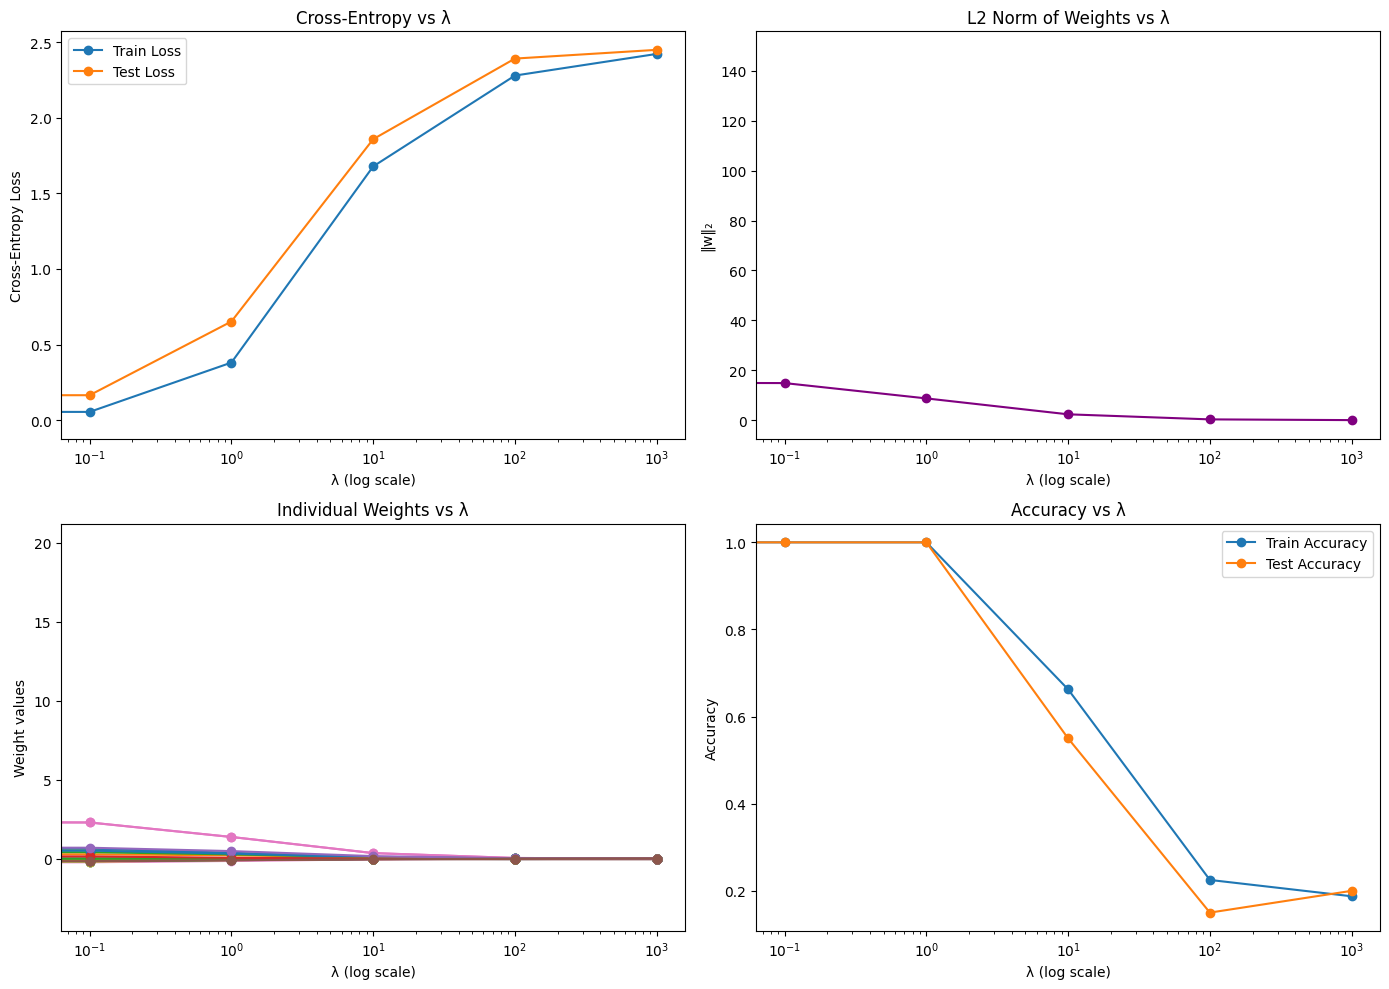

In [ ]:
plt.figure(figsize=(14, 10))
# 1. Cross-Entropy Loss
plt.subplot(2, 2, 1)
plt.plot(lambdas, train_losses, marker='o', label="Train Loss")
plt.plot(lambdas, test_losses, marker='o', label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy vs λ")
plt.legend()
# 2. L2 Norm of Weights
plt.subplot(2, 2, 2)
plt.plot(lambdas, weight_norms, marker='o', color="purple")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("‖w‖₂")
plt.title("L2 Norm of Weights vs λ")
# 3. Individual Weights
plt.subplot(2, 2, 3)
for j in range(weights_array.shape[1]):
    plt.plot(lambdas, weights_array[:, j], marker='o', label=f"w{j}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Weight values")
plt.title("Individual Weights vs λ")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize="small"
# 4. Accuracy
plt.subplot(2, 2, 4)
plt.plot(lambdas, accuracies_train, marker='o', label="Train Accuracy")
plt.plot(lambdas, accuracies_test, marker='o', label="Test Accuracy")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.legend()
plt.tight_layout()
plt.show()

(e) Re-format the data in the following way: take each of the input variables, and feed it through
a set of Gaussian basis functions, defined as follows. For each variable (except the bias term),
use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ.
You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.

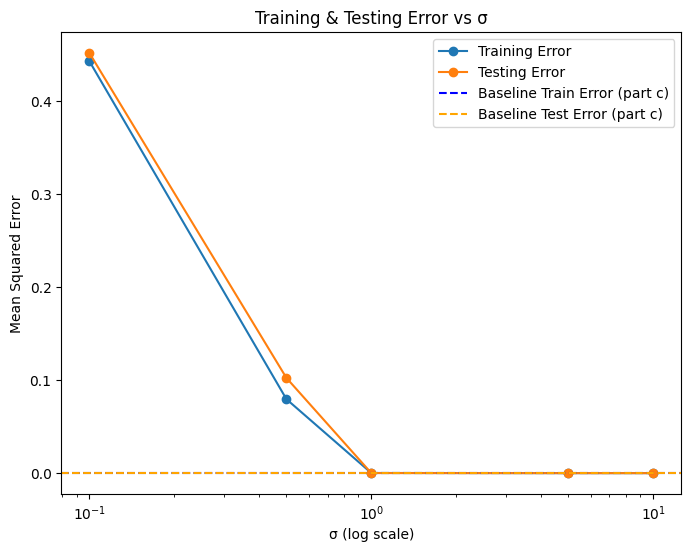

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Gaussian basis expansion (from part e)
def gaussian_basis_transform(X, sigma):
    means = np.linspace(-10, 10, 5)   # 5 means
    X_new = []
    col_names = []
    for col in X.columns:
        x_col = X[col].values.reshape(-1, 1)
        for mu in means:
            phi = np.exp(- (x_col - mu) ** 2 / (2 * sigma**2))
            X_new.append(phi)
            col_names.append(f"{col}_mu{mu}_sigma{sigma}")
    X_new = np.hstack(X_new)
    return pd.DataFrame(X_new, columns=col_names)
data = pd.read_csv("favorite_music_dataset.csv")
X = data[["Release_Year", "Duration_Minutes"]]   # numeric features
y = data["Duration_Minutes"]                     # target (regression)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
baseline_train_err = mean_squared_error(y_train, baseline_model.predict(X_train))
baseline_test_err = mean_squared_error(y_test, baseline_model.predict(X_test))
sigmas = [0.1, 0.5, 1, 5, 10]
train_errors, test_errors = [], []
for sigma in sigmas:
    X_train_phi = gaussian_basis_transform(X_train, sigma)
    X_test_phi = gaussian_basis_transform(X_test, sigma)
    model = LinearRegression()
    model.fit(X_train_phi, y_train)
    y_train_pred = model.predict(X_train_phi)
    y_test_pred = model.predict(X_test_phi)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(8,6))
plt.plot(sigmas, train_errors, marker='o', label="Training Error")
plt.plot(sigmas, test_errors, marker='o', label="Testing Error")
plt.axhline(y=baseline_train_err, color='blue', linestyle='--', label="Baseline Train Error (part c)")
plt.axhline(y=baseline_test_err, color='orange', linestyle='--', label="Baseline Test Error (part c)")
plt.xscale("log")
plt.xlabel("σ (log scale)")
plt.ylabel("Mean Squared Error")
plt.title("Training & Testing Error vs σ")
plt.legend()
plt.show()


(f) Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off.

Baseline (no basis expansion) MSEs:
 - Train MSE: 0.5629379088584994
 - Test  MSE: 0.5251432964621744

σ = 0.1: Train MSE = 0.5641, Test MSE = 0.5307

σ = 0.5: Train MSE = 0.5351, Test MSE = 0.5799

σ = 1: Train MSE = 0.5379, Test MSE = 0.5885

σ = 5: Train MSE = 0.5234, Test MSE = 0.6002

σ = 10: Train MSE = 0.5234, Test MSE = 0.6002


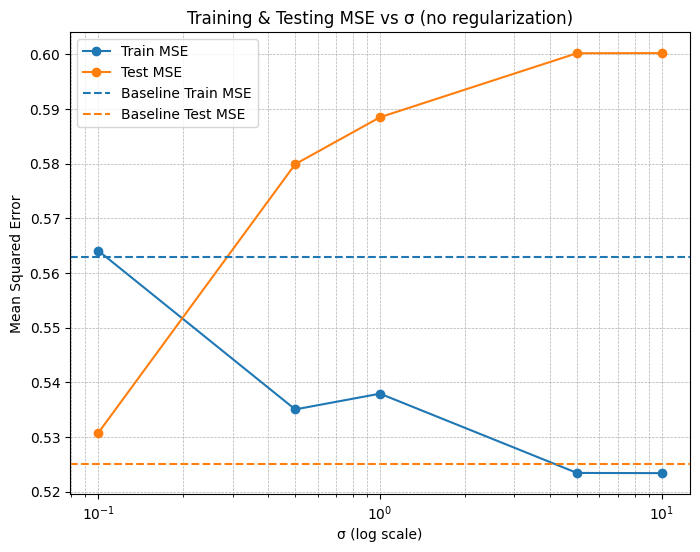

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def gaussian_basis_transform(X_df, sigma, n_means=5, mu_min=-10, mu_max=10):
    means = np.linspace(mu_min, mu_max, n_means)
    X_new_cols = []
    col_names = []
    for col in X_df.columns:
        x = X_df[col].values.reshape(-1, 1)  # shape (n_samples, 1)
        for mu in means:
            phi = np.exp(- (x - mu)**2 / (2 * (sigma**2)))
            X_new_cols.append(phi)
            col_names.append(f"{col}_mu{mu:.2f}_sig{sigma}")
    X_new = np.hstack(X_new_cols)
    return pd.DataFrame(X_new, columns=col_names)
data = pd.read_csv("favorite_music_dataset.csv")
if "Release_Year" not in data.columns or "Duration_Minutes" not in data.columns:
    raise ValueError("CSV must contain 'Release_Year' and 'Duration_Minutes' columns.")
X_raw = data[["Release_Year"]].copy()       # predictors (DataFrame)
y = data["Duration_Minutes"].values         # target (1D array)
scaler = StandardScaler()
X_scaled_arr = scaler.fit_transform(X_raw)   # shape (n_samples, n_features)
X_scaled = pd.DataFrame(X_scaled_arr, columns=X_raw.columns)

# Train-test split (80% train+val, 20% test)
X_train_base, X_test_base, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)
# linear regression on original features
baseline_model = LinearRegression()
baseline_model.fit(X_train_base, y_train)
baseline_train_mse = mean_squared_error(y_train, baseline_model.predict(X_train_base))
baseline_test_mse  = mean_squared_error(y_test,  baseline_model.predict(X_test_base))
print("Baseline (no basis expansion) MSEs:")
print(" - Train MSE:", baseline_train_mse)
print(" - Test  MSE:", baseline_test_mse)
# Experiment for various sigma values (no regularization)
sigmas = [0.1, 0.5, 1, 5, 10]
train_mse_list = []
test_mse_list  = []
for sigma in sigmas:
    # Transform
    X_train_phi = gaussian_basis_transform(X_train_base, sigma=sigma)
    X_test_phi  = gaussian_basis_transform(X_test_base,  sigma=sigma)
    # Fit ordinary least squares
    model = LinearRegression()
    model.fit(X_train_phi, y_train)
    # Predict & compute MSE
    y_train_pred = model.predict(X_train_phi)
    y_test_pred  = model.predict(X_test_phi)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse  = mean_squared_error(y_test,  y_test_pred)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    print(f"\nσ = {sigma}: Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")

plt.figure(figsize=(8,6))
plt.plot(sigmas, train_mse_list, marker='o', label="Train MSE")
plt.plot(sigmas, test_mse_list,  marker='o', label="Test MSE")
plt.axhline(baseline_train_mse, color='tab:blue', linestyle='--', label="Baseline Train MSE")
plt.axhline(baseline_test_mse,  color='tab:orange', linestyle='--', label="Baseline Test MSE")
plt.xscale('log')   # sigma spans multiple orders, log scale helps visualization
plt.xlabel("σ (log scale)")
plt.ylabel("Mean Squared Error")
plt.title("Training & Testing MSE vs σ (no regularization)")
plt.legend()
plt.grid(True, which='both', ls='--', lw=0.5)
plt.show()


(g) Add in all the basis function and perform regularized regression with the regularization
parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy
error for the training data and the testing data, as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different
graph the L2 norm of the weights for the set of basis functions corresponding to each value
of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.

(h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions
that capture relationships between the inputs. Explain the impact of this choice on the bias-variance trade-off. No experiments are needed (although you are welcome to explore
this on your own).

In [ ]:
import numpy as np

def multivariate_gaussian_basis(X, centers, cov_matrices):
    X = np.array(X)
    n_samples = X.shape[0]
    n_basis = len(centers)
    phi = np.zeros((n_samples, n_basis))
    for i, (mu, sigma) in enumerate(zip(centers, cov_matrices)):
        # Ensure mu and sigma are numpy arrays
        mu = np.array(mu)
        sigma = np.array(sigma)
        # Compute multivariate Gaussian
        diff = X - mu
        try:
            sigma_inv = np.linalg.inv(sigma)
        except np.linalg.LinAlgError:
            sigma_inv = np.linalg.pinv(sigma)  # pseudo-inverse if singular
        exponent = -0.5 * np.sum(diff @ sigma_inv * diff, axis=1)
        phi[:, i] = np.exp(exponent)
    return phi
X_ex= np.array([[1, 2],
                      [2, 3],
                      [3, 5]])
# assume 3 centers
centers = [
    [1, 2],
    [2, 3],
    [3, 5]]
# Covariance matrices for each basis function
cov= [
    [[0.5, 0.1], [0.1, 0.5]],
    [[0.5, 0.2], [0.2, 0.5]],
    [[0.5, -0.1], [-0.1, 0.5]]]

phi = multivariate_gaussian_basis(X_ex, centers, cov)
print("Transformed features (phi):\n", phi)


Transformed features (phi):
 [[1.00000000e+00 2.39651036e-01 1.07942553e-07]
 [1.88875603e-01 1.00000000e+00 2.37759295e-03]
 [1.60200953e-05 1.74639059e-02 1.00000000e+00]]


(i) Suppose that instead of wanting to use a fixed set of evenly-spaced basis functions, you would
like to adapt the placement of these functions. Derive a learning algorithm that computes
both the placement of the basis function, μi and the weight vector w from data (assuming
that the width σ isfixed. You should still allow for L2 regularization of the weight vector.
Note that your algorithm will need to be iterative.

In [ ]:
import numpy as np
X = np.array([[1.0], [2.0], [3.0], [4.0], [5.0]])
y = np.array([0, 0, 1, 1, 1])
n_basis = 3          # number of Gaussian basis functions
sigma = 0.5          # fixed width
lambda_reg = 0.1     # L2 regularization
eta = 0.01           # learning rate for μ update
n_iter = 100         # number of iterations
n_samples, n_features = X.shape
# Using random samples as initial centers
mu = X[np.random.choice(n_samples, n_basis, replace=False), :].copy()
for iteration in range(n_iter):
    # Compute RBF features
    Phi = np.zeros((n_samples, n_basis))
    for i in range(n_basis):
        diff = X - mu[i]  # shape (n_samples, n_features)
        Phi[:, i] = np.exp(-np.sum(diff**2, axis=1) / (2 * sigma**2))
    # Update weights w (closed-form, regularized)
    # w = (Phi^T Phi + λ I)^(-1) Phi^T y
    A = Phi.T @ Phi + lambda_reg * np.eye(n_basis)
    b = Phi.T @ y
    w = np.linalg.solve(A, b)
    # Update centers μ_i (gradient descent)
    y_pred = Phi @ w
    for i in range(n_basis):
        # gradient w.r.t. μ_i
        diff = X - mu[i]  # (n_samples, n_features)
        grad_mu = np.sum(((y_pred - y)[:, np.newaxis] * w[i]) * (diff / sigma**2) * Phi[:, i][:, np.newaxis], axis=0)
        # gradient step
        mu[i] -= eta * grad_mu
    # print loss every 10 iterations
    if iteration % 10 == 0:
        loss = 0.5 * np.sum((y_pred - y)**2) + 0.5 * lambda_reg * np.sum(w**2)
        print(f"Iteration {iteration}, Loss: {loss:.4f}")
print("Learned weights w:", w)
print("Learned centers μ:", mu)


Iteration 0, Loss: 0.9241
Iteration 10, Loss: 0.8968
Iteration 20, Loss: 0.8605
Iteration 30, Loss: 0.8108
Iteration 40, Loss: 0.7465
Iteration 50, Loss: 0.6794
Iteration 60, Loss: 0.6333
Iteration 70, Loss: 0.6130
Iteration 80, Loss: 0.6060
Iteration 90, Loss: 0.6039
Learned weights w: [-2.21391050e-03  1.44621926e-03  1.46445631e+00]
Learned centers μ: [[0.99999522]
 [2.00110182]
 [3.50681007]]


(j) Does your algorithm converge? If so, does it obtain a locally or globally optimal solution?
Explain your answer.

Convergence: Yes, the algorithm usually converges to a stable solution.

Optimality: Only locally optimal, not guaranteed to be globally optimal.

Practical tip:

Use multiple random initializations and choose the solution with the lowest error.

Or initialize μ using k-means, which often leads to a better local minimum.

2. Experiment on any complex datasets to demonstrate the Linear REGRESSION and its versions, and
logistic regression (CLASSIFICATION) along with complete data preprocessing steps.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report


In [ ]:
df = pd.read_csv("powerconsumption.csv")

In [ ]:
print(df.columns)

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')


In [ ]:
df['TotalPower'] = df['PowerConsumption_Zone1'] + df['PowerConsumption_Zone2'] + df['PowerConsumption_Zone3']

In [ ]:
X = df[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']]
y_reg = df['TotalPower']  # Regression target


In [ ]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
TotalPower                0
dtype: int64


In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_train = lin_reg.predict(X_train_scaled)
y_pred_test = lin_reg.predict(X_test_scaled)

print("Linear Regression:")
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))


Linear Regression:
Train MSE: 218417862.94613796
Test MSE: 213680443.38278624
Train R²: 0.25815965472416824
Test R²: 0.2673950073071425


In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_test_ridge = ridge.predict(X_test_scaled)
print("\nRidge Regression Test MSE:", mean_squared_error(y_test, y_pred_test_ridge))



Ridge Regression Test MSE: 213680502.07944542


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_test_lasso = lasso.predict(X_test_scaled)
print("\nLasso Regression Test MSE:", mean_squared_error(y_test, y_pred_test_lasso))



Lasso Regression Test MSE: 213680589.49746746


In [ ]:
# Create binary target
threshold = np.percentile(df['TotalPower'], 75)
y_class = (df['TotalPower'] > threshold).astype(int)
# split into train and test
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
# Scale features
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_class_scaled, y_train_class)
y_pred_test_class = log_reg.predict(X_test_class_scaled)
print("\nLogistic Regression (Classification):")
print("Test Accuracy:", accuracy_score(y_test_class, y_pred_test_class))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_test_class))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_test_class))


Logistic Regression (Classification):
Test Accuracy: 0.7787104158718047
Confusion Matrix:
 [[7316  490]
 [1830  848]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86      7806
           1       0.63      0.32      0.42      2678

    accuracy                           0.78     10484
   macro avg       0.72      0.63      0.64     10484
weighted avg       0.76      0.78      0.75     10484

